In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import sys
sys.path.append('../../data_manip/')
import data_manip

In [2]:
samp = pd.read_csv('../rossmann-store-sales/sample_submission.csv')

train = pd.read_csv('../rossmann-store-sales/train.csv', parse_dates=True, index_col = 'Date')

test = pd.read_csv('../rossmann-store-sales/test.csv', parse_dates=True, index_col = 'Date')

store = pd.read_csv('../rossmann-store-sales/store.csv')


C:\Users\brock\AppData\Local\Temp\ipykernel_78080\2904480885.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../rossmann-store-sales/train.csv', parse_dates=True, index_col = 'Date')


In [3]:
print(samp.head())
print("------------------------------------------------------------/n")
print(train.head())
print("------------------------------------------------------------/n")
print(train.head())
print("------------------------------------------------------------/n")
print(test.head())
print("------------------------------------------------------------/n")

   Id  Sales
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0
------------------------------------------------------------/n
            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
------------------------------------------------------------/n
            Store  DayOfWeek  Sales  Customers  Open  Promo StateHo

In [4]:
train.shape, test.shape, store.shape

((1017209, 8), (41088, 7), (1115, 10))

In [5]:
train.info()
print("------------------------------------------------------------/n")
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB
------------------------------------------------------------/n
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   Day

In [6]:
start = train.index.min()
end = train.index.max()

print(str(start - end) + " days of data.")

-941 days +00:00:00 days of data.


## Data Extraction

In [7]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

C:\Users\brock\AppData\Local\Temp\ipykernel_78080\3549331600.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['WeekOfYear'] = train.index.weekofyear


## Data Exploration

### Average Monthly Sales, Pct Change in Sales

In [8]:
## We can discover several new features

## Group by Datetimeindex and we can observe average sales and change in sales over time
average_sales_month = train.groupby(train['Month'])["Sales"].mean()
pct_change_sales_month = train.groupby(train['Month'])["Sales"].sum().pct_change()

average_sales_week = train.groupby(train['WeekOfYear'])["Sales"].mean()
pct_change_sales_week = train.groupby(train['WeekOfYear'])["Sales"].sum().pct_change()


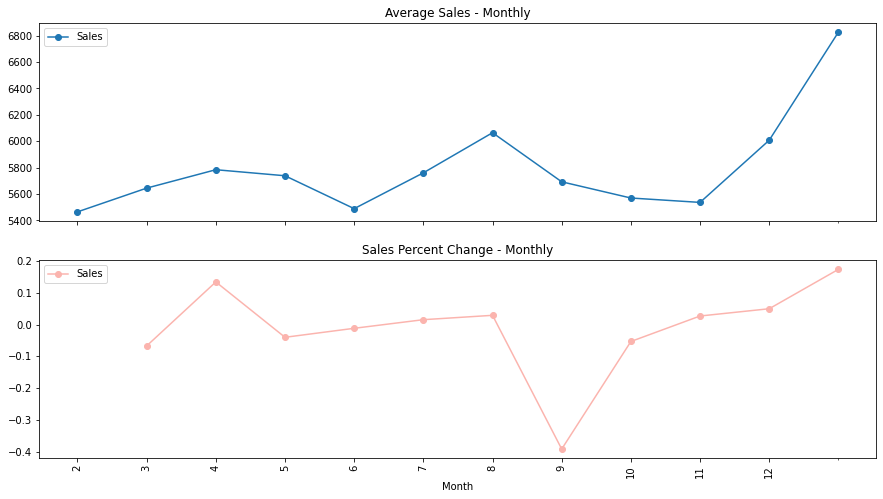

In [9]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales_month.plot(legend=True,ax=axis1,marker='o',title="Average Sales - Monthly")
ax1.set_xticks(range(len(average_sales_month)))
ax1.set_xticklabels(average_sales_month.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales_month.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="Pastel1",title="Sales Percent Change - Monthly")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

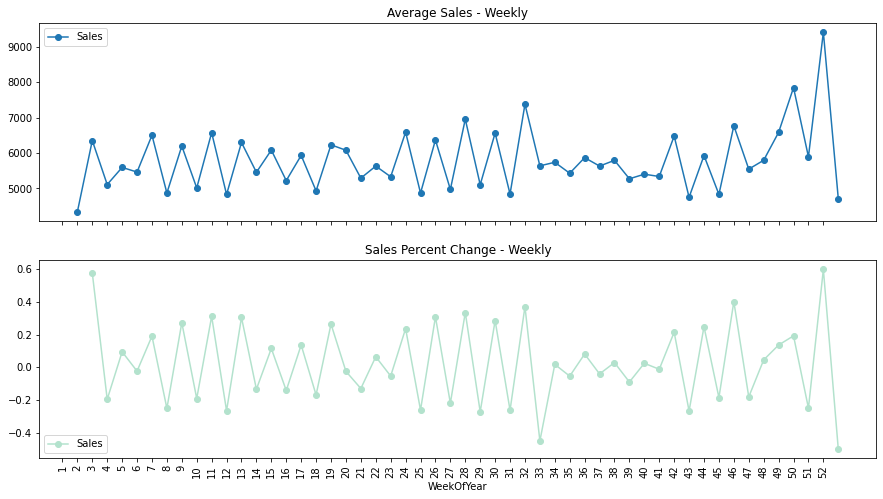

In [10]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = average_sales_week.plot(legend=True, ax=axis1, marker='o', rot=90,title="Average Sales - Weekly")
ax1.set_xticks(range(len(average_sales_week)))
ax1.set_xticklabels(average_sales_week.index.tolist(), rotation=90)

ax2 = pct_change_sales_week.plot(legend=True, ax=axis2, marker='o', rot=90,colormap="Pastel2",title="Sales Percent Change - Weekly")

### Mean Weekly Sales by Year

In [11]:
weeks = train.groupby(train['Year'])['Sales'].sum()

weekly_sales2015 = train.loc[train['Year']==2015].groupby(['WeekOfYear'])['Sales'].mean()
weekly_sales2014 = train.loc[train['Year']==2014].groupby(['WeekOfYear'])['Sales'].mean()
weekly_sales2013 = train.loc[train['Year']==2013].groupby(['WeekOfYear'])['Sales'].mean()


In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter( x = weekly_sales2015.index, y = weekly_sales2015[:], name = 'Mean Sales 2015', mode = 'lines') )
fig.add_trace(go.Scatter( x = weekly_sales2014.index, y = weekly_sales2014[:], name = 'Mean Sales 2014', mode = 'lines') )
fig.add_trace(go.Scatter( x = weekly_sales2013.index, y = weekly_sales2013[:], name = 'Mean Sales 2013', mode = 'lines') )
fig.update_layout(title = 'Sales 2013, 2014, 2015', xaxis_title = 'Week of Year')

## Correlation Matrix for Features and Sales

C:\Users\brock\AppData\Local\Temp\ipykernel_78080\3236778008.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: title={'center': 'Correlation Matrix'}>

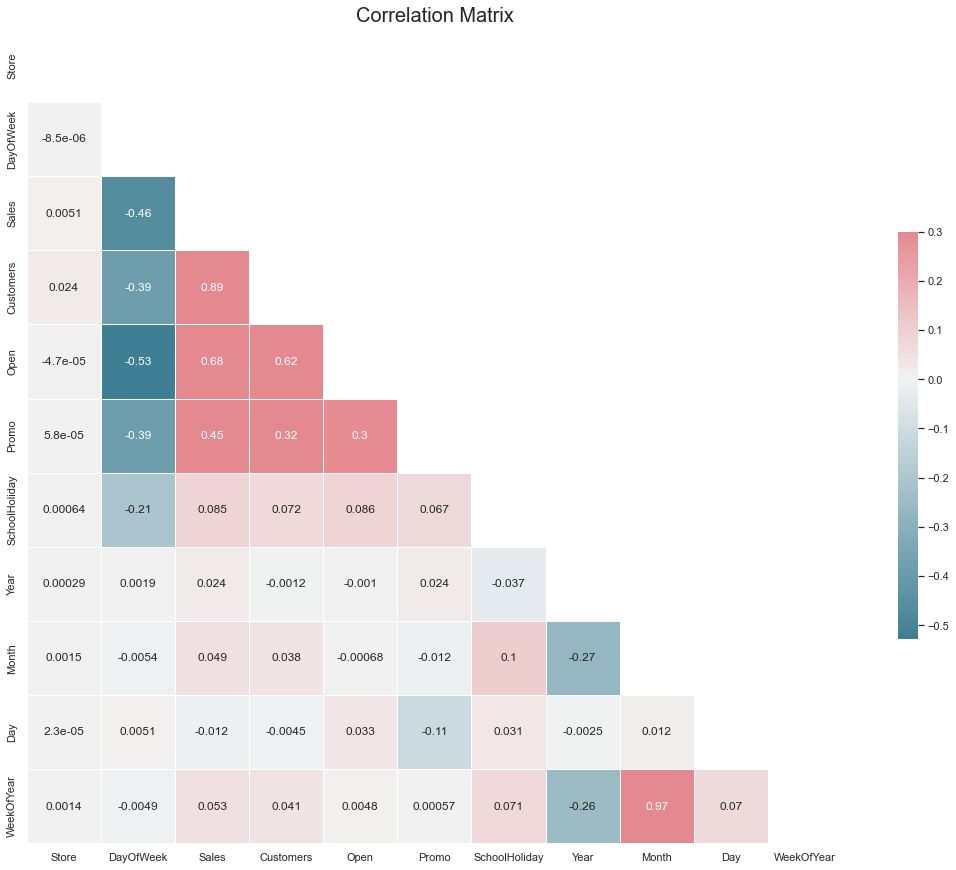

In [13]:
sns.set(style="white")
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=20)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

From the above correlations matrix, several aspects can be observed.

Lets look at the correlations of Sales from greatest to least. 

In [14]:
corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = 'Sales', ascending = False)
corr_sales = corr_df['Sales']
bar = px.bar(x = corr_sales.index, y = corr_sales.values, color=corr.index, labels={'x':'Features', 'y': 'Correlation'},
             title='Feature correlation with Sales')
bar.update_traces(showlegend=False)

From the above plot, we can see that Customers, Open, and Promo are the features with the highest correlation to Sales